         Date Symbol Series  Prev Close     Open     High     Low     Last  \
0  2015-01-01   INFY     EQ     1972.55  1968.95  1982.00  1956.9  1971.00   
1  2015-01-02   INFY     EQ     1974.40  1972.00  2019.05  1972.0  2017.95   
2  2015-01-05   INFY     EQ     2013.20  2009.90  2030.00  1977.5  1996.00   
3  2015-01-06   INFY     EQ     1995.90  1980.00  1985.00  1934.1  1965.10   
4  2015-01-07   INFY     EQ     1954.20  1965.00  1974.75  1950.0  1966.05   

     Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  1974.40  1971.34   500691  9.870306e+13   14908              258080   
1  2013.20  2003.25  1694580  3.394669e+14   54166             1249104   
2  1995.90  2004.59  2484256  4.979911e+14   82694             1830962   
3  1954.20  1954.82  2416829  4.724458e+14  108209             1772070   
4  1963.55  1962.59  1812479  3.557162e+14   62463             1317720   

   %Deliverble  
0       0.5154  
1       0.7371  
2       0.7370  
3       0.7332  
4

c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


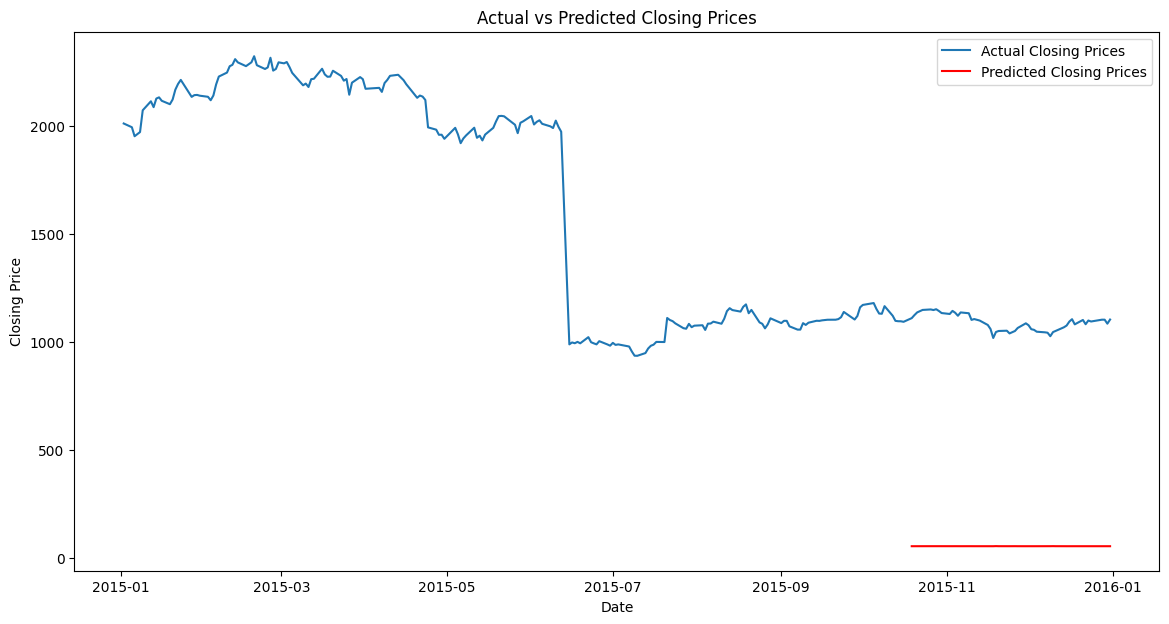

Next Day's Predicted Closing Price: 55.79712844350823


c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('infy_stock.csv')

# Display the first few rows of the dataframe
print(df.head())

# Assuming 'Date' is a column and 'Close' is the target
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare the data for time series forecasting
# We'll use the closing price of the previous day to predict the closing price of the next day
df['Previous_Close'] = df['Close'].shift(1)
df = df.dropna()

# Features and target
X = df[['Previous_Close']]
y = df['Close']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Create and train the MLP model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Closing Prices')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Closing Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

# Predict the next day's closing price
last_close = df['Close'].iloc[-1]
last_scaled_close = scaler.transform([[last_close]])
next_day_prediction = model.predict(last_scaled_close)
print(f"Next Day's Predicted Closing Price: {next_day_prediction[0]}")
